# Recommender Systems with Python

In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import seaborn as sns

In [2]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [9]:
## reading the data file 
df= pd.read_csv('u.data',sep='\t', names =col_names)

In [11]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [19]:
# grabbing the movie titles
movie_titles = pd.read_csv('Movie_Id_Titles')

In [18]:
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [21]:
# merging user id data with movie title id on item_id

In [34]:
df = pd.merge(df, movie_titles, on='item_id')
df.head()

MergeError: Passing 'suffixes' which cause duplicate columns {'title_x'} is not allowed.

# Opps !! 
##### Ignore the above error , its not error actually , I ran marge method twice so it happened !


In [36]:
df.drop('title_x', axis =1, inplace =True)

In [37]:
df.drop('title_y', axis=1, inplace =True)

In [27]:
df['title'].nunique()

1664

<Axes: xlabel='rating', ylabel='count'>

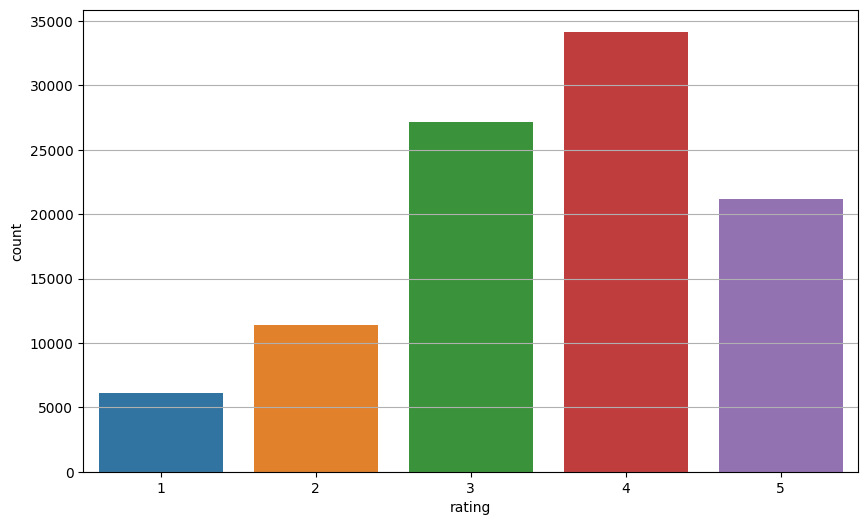

In [31]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.countplot(x='rating', data=df)

In [32]:
sns.set_style('whitegrid')

## Checking for highest rating movies

In [43]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

#### Which movie has the highest rating points overall 

In [45]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

### Which user contributed highest ratings 

In [47]:
df.groupby('user_id')['rating'].count().sort_values(ascending = False).head()

user_id
405    737
655    685
13     636
450    540
276    518
Name: rating, dtype: int64

# Creating Dataframe of ratings based on individual movies

In [52]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [55]:
# adding the number of ratings to the dataframe ratings 

In [56]:
ratings['no of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [57]:
ratings

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


# ---------------- EDA --------------

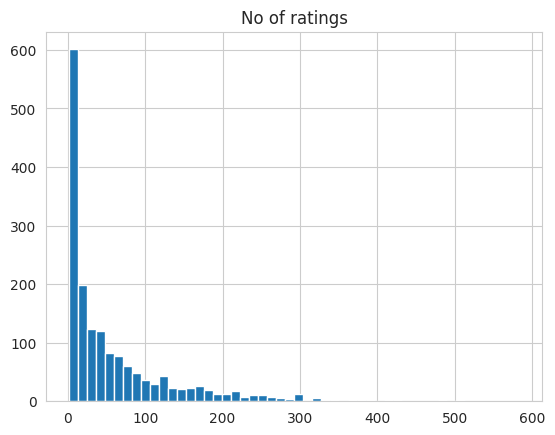

In [62]:
plt.title('No of ratings')
plt.hist(ratings['no of ratings'], bins = 50)
plt.show()

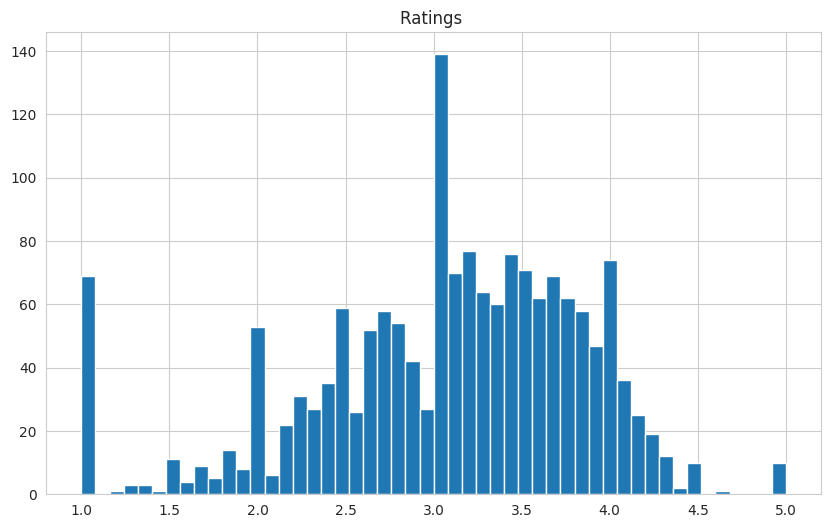

In [65]:
plt.figure(figsize=(10,6))
plt.title("Ratings ")
plt.hist(ratings['rating'], bins = 50)
plt.show()

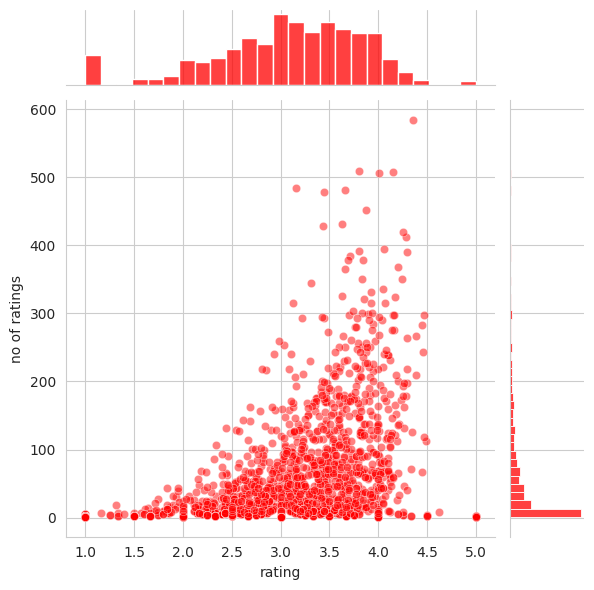

In [68]:
sns.jointplot(x='rating', y='no of ratings', data= ratings, alpha = 0.5, color = 'red')

In [69]:
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


# ------------- Advanced Recommender System ----------------

In [70]:
moviemat = df.pivot_table(index='user_id', columns = 'title', values= 'rating' )

In [72]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# a lot of NaN values 

In [80]:

# Num of ratings on individual movies


ratings.sort_values('no of ratings', ascending = False).head(10)

,rating,no of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [81]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [95]:
starwars_user_ratings, liarliar_user_ratings

(user_id
 0      5.0
 1      5.0
 2      5.0
 3      NaN
 4      5.0
       ... 
 939    NaN
 940    4.0
 941    NaN
 942    5.0
 943    4.0
 Name: Star Wars (1977), Length: 944, dtype: float64,
 user_id
 0      NaN
 1      NaN
 2      1.0
 3      2.0
 4      5.0
       ... 
 939    NaN
 940    4.0
 941    4.0
 942    NaN
 943    NaN
 Name: Liar Liar (1997), Length: 944, dtype: float64)

In [91]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_starwars

/usr/lib64/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/lib64/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [96]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)
similar_to_liarliar

/usr/lib64/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/lib64/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [99]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['correlation'])
corr_starwars.dropna(inplace = True)

In [100]:
corr_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [101]:
corr_starwars.sort_values('correlation', ascending=False)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


* Note:  -> look at the above data , the above movies which has correaltion 1 is perfectly correlated \ to Star War movie which doesn't make any sense 

#### So, to solve this problem , let's filter out the movies which has no of ratings less than 100   

In [115]:
corr_starwars = corr_starwars.join(ratings['no of ratings'])

In [116]:
corr_starwars

,correlation,no of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [122]:
corr_starwars[corr_starwars['no of ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,no of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [131]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'] )
corr_liarliar

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
...,...
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016
Zeus and Roxanne (1997),-0.500000


In [132]:
corr_liarliar.dropna(inplace=True)


In [133]:
corr_liarliar

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
...,...
Young Guns (1988),0.410988
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016


In [135]:
corr_liarliar = corr_liarliar.join(ratings['no of ratings'])

In [136]:
corr_liarliar.head()

,Correlation,no of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [138]:
corr_liarliar[corr_liarliar['no of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,no of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
